## Tensorflow를 이용한 Linear Regression
- Tesnsorflow 설치
- Tensorflow는 버전이 1.x 2.x 버전이 있다.
- `pip install tensorflow==1.15` 

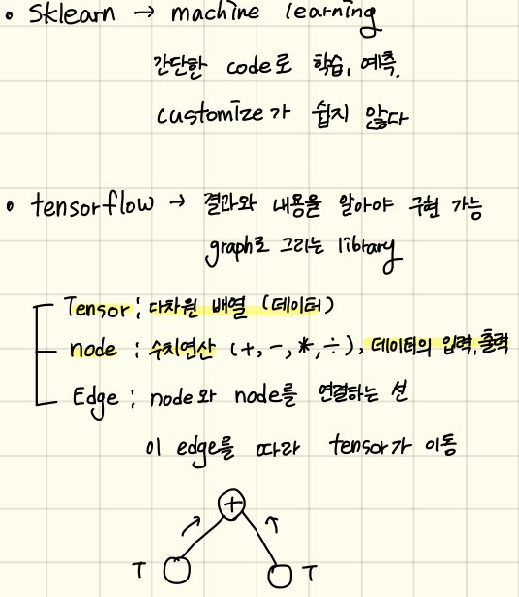
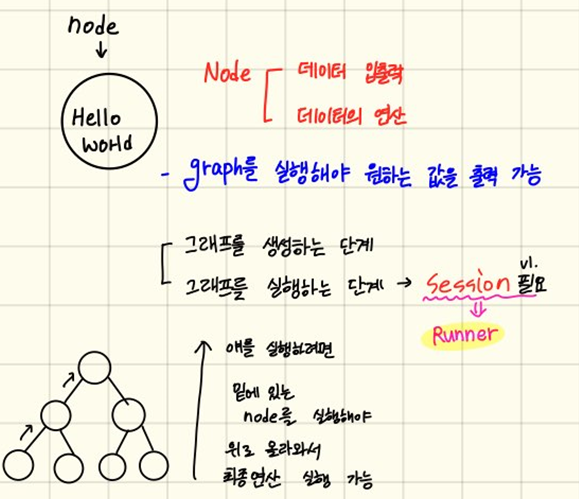

In [1]:
## Tensorflow를 이용한 Linear Regression
# Tesnsorflow 설치

import tensorflow as tf

print(tf.__version__)

node = tf.constant('Hello World') # Node 생성

# 만든 Graph를 실행하기 위해 Session이 필요
sess = tf.Session()

# runner인 Session이 생성되었으니, 이걸 이용해서 node 실행
print(sess.run(node))            # b'Hello World' - byte tyoe
print(sess.run(node).decode())   # Hello World - unicode

1.15.0
b'Hello World'
Hello World


In [7]:
import tensorflow as tf

# constant node를 2개 만든다.

# tensorflow의 기본 자료구조가 numpy라 이것도 됨
# node1 = tf.constanf(10, dtype=np.float64)
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3))          # 30.0
print(sess.run([node3, node2])) # [30.0, 20.0]

30.0
[30.0, 20.0]


상수 (constant)를 이용하지 않고, 그래프에서 수를 입력받으려면 `placeholder` 이용
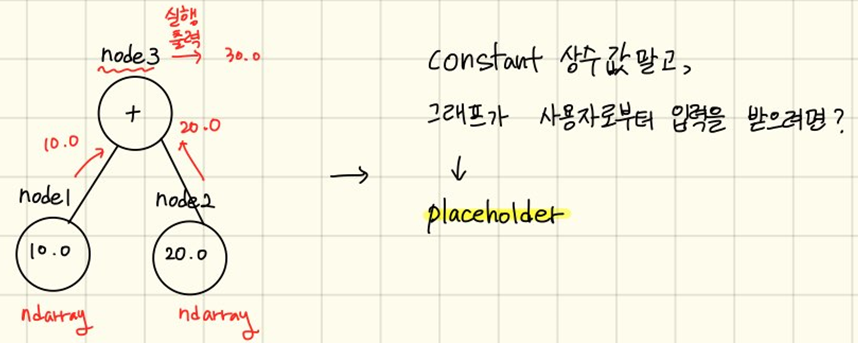

In [9]:
# placeholder를 시용
# 2개의 수를 입력으로 받아서 덧셈 연산을 수행

import tensorflow as tf

# scalar 형태의 값 1개를 실수로 받아들일 수 있는 placeholder
node1 = tf.placeholder(dtype=tf.float32) 
node2 = tf.placeholder(dtype=tf.float32) 

node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3, feed_dict={ node1: 20, node2: 40}))    

60.0


In [13]:
import tensorflow as tf

# 1. Raw Data Lading
# 2. Data Preprocessing (데이터 전처리)

# 3. Training Data Set
x_data = [2, 4, 5, 7, 10]
t_data = [7, 11, 13, 17, 23]

# 4. Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight') # W = np.random.rand(1,1)
b = tf.Variable(tf.random.normal([1]), name='bias')   # b = np.random.rand(1,1)
 
# 5. Hypothesis, Simple Regression Model
H = W * x_data + b

# 6. Loss function
# tf.square -> tensorflow의 제곱 함수
loss = tf.reduce_mean(tf.square(t_data - H))

# 7. train node 생성
# GradientDescentOptimizer는 객체만 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
# loss 값을 '한번' 줄이는/수치미분하는 내장 함수 -> 9번에서 반복 진행
train = optimizer.minimize(loss) 

# 8. 실행 준비 및 초기화작업
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 초기화 작업 tensorflow1버전

# 9. 반복해서 학습을 진행
for step in range(30000):
    __, W_val, b_val = sess.run([train, W, b]) # train은 값 얻어오는게 아니라 _
    
    if step % 3000 == 0:
        print('W: {}, b: {}'.format(W_val, b_val))
    
print(sess.run(H))
# [ 6.9997516 10.999857  12.999908  17.000013  23.000172 ]
# t_data = [7, 11, 13, 17, 23] => 실측치와 비슷한 값 예측

W: [0.7136351], b: [-1.6916636]
W: [2.2073092], b: [1.5705966]
W: [2.067161], b: [2.5369258]
W: [2.0217595], b: [2.8499715]
W: [2.0070515], b: [2.951388]
W: [2.0022848], b: [2.9842439]
W: [2.000743], b: [2.9948838]
W: [2.0002403], b: [2.998345]
W: [2.0000865], b: [2.9994106]
W: [2.0000525], b: [2.9996467]
[ 6.9997516 10.999857  12.999908  17.000013  23.000172 ]


위의 코드는 알고 싶은 값을 물어보는 코드가 없다.

In [3]:
import tensorflow as tf

# 1. Raw Data Loading
# 2. Data Preprocessing

# 3. Training Data Set
x_data = [1, 2, 3, 4, 5]
t_data = [2, 4, 6, 8, 10]

# 4. placeholder
X = tf.placeholder(dtype=tf.float32)
T = tf.placeholder(dtype=tf.float32)

# 5. Weight & bias  shape => (3, 4)
W = tf.Variable(tf.random.normal([1]), name='wieght')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 6. Simple Linear Regression Model (Hypothesis)
H = W*X + b

# 7. loss function
loss = tf.reduce_mean(tf.square(H-T))

# 8. train 노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# 9. Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 10. 학습 진행 (Graph를 실행)
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        
# 11. 내가 알고싶은 값을 넣어서 predict
print(sess.run(H, feed_dict={X:[6]}))

W : [-0.3408489], b : [0.83575726], cost : 51.63417434692383
W : [1.8615637], b : [0.4997989], cost : 0.04549857974052429
W : [1.9498028], b : [0.18122767], cost : 0.005982143804430962
W : [1.9817972], b : [0.06571659], cost : 0.00078661396401003
W : [1.9933964], b : [0.02383802], cost : 0.00010350716911489144
W : [1.9976019], b : [0.008655], cost : 1.3645971193909645e-05
W : [1.9991287], b : [0.00314498], cost : 1.8013204226008384e-06
W : [1.9996811], b : [0.00115179], cost : 2.415574726910563e-07
W : [1.9998837], b : [0.00041687], cost : 3.1726141713761535e-08
W : [1.9999511], b : [0.00016924], cost : 5.2671680350613315e-09
[11.999929]


온도, 태양광, 바람에 따른 오존량을 학습해서 예측하는 **Multiuple Linear Regression**을 Tensorflow로 구현해 보기

In [13]:
## 온도, 태양광, 바람에 따른 오존량을 학습해서 예측하는 Multiuple Linear Regression을
## Tensorflow로 구현해 보기

import tensorflow as tf
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')

# 2. Data Preprocessing (데이터 전처리)
# 결측치 제거
df = df.dropna(how='any')
df = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]
print(df)
#     [111 rows x 4 columns]

# 3. 이상치 처리
zscore_threshold = 2.0  # 97.7 % 이상, 2.3% 이하인 값들을 이상치로 판별

# 각 colum의 이상치를 확인하고 제거
for col in df.columns:
    outliers = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[~df[col].isin(outliers)]
    
print(df)
#          Ozone  Solar.R  Wind  Temp
#     0     41.0    190.0   7.4    67
#     1     36.0    118.0   8.0    72
#     2     12.0    149.0  12.6    74
#     3     18.0    313.0  11.5    62
#     6     23.0    299.0   8.6    65
#     ..     ...      ...   ...   ...
#     147   14.0     20.0  16.6    63
#     148   30.0    193.0   6.9    70
#     150   14.0    191.0  14.3    75
#     151   18.0    131.0   8.0    76
#     152   20.0    223.0  11.5    68

#     [96 rows x 4 columns]

# 4. 정규화
# - 독립변수와 종속변수의 scaler 객체를 각각 생성
scaler_x = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성
scaler_t = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성

training_data_x = df.iloc[:,1:]
training_data_t = df['Ozone'].values.reshape(-1,1)

scaler_x.fit(training_data_x)
scaler_t.fit(training_data_t)

training_data_x = scaler_x.transform(training_data_x)
training_data_t = scaler_t.transform(training_data_t)

# 5. Training Data Set
x_data = training_data_x
t_data = training_data_t

# 6. placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 7. Weight & bias
W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 8. Hypothesis(Multiple Linear Regression Model)
H = tf.matmul(X,W) + b

# 9. loss function
loss = tf.reduce_mean(tf.square(H-T))

# 10 train 노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# 11. Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 12. 학습을 진행(Graph를 실행)
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        

     Ozone  Solar.R  Wind  Temp
0     41.0    190.0   7.4    67
1     36.0    118.0   8.0    72
2     12.0    149.0  12.6    74
3     18.0    313.0  11.5    62
6     23.0    299.0   8.6    65
..     ...      ...   ...   ...
147   14.0     20.0  16.6    63
148   30.0    193.0   6.9    70
150   14.0    191.0  14.3    75
151   18.0    131.0   8.0    76
152   20.0    223.0  11.5    68

[111 rows x 4 columns]
     Ozone  Solar.R  Wind  Temp
0     41.0    190.0   7.4    67
1     36.0    118.0   8.0    72
2     12.0    149.0  12.6    74
3     18.0    313.0  11.5    62
6     23.0    299.0   8.6    65
..     ...      ...   ...   ...
147   14.0     20.0  16.6    63
148   30.0    193.0   6.9    70
150   14.0    191.0  14.3    75
151   18.0    131.0   8.0    76
152   20.0    223.0  11.5    68

[96 rows x 4 columns]
W : [[ 0.5885885]
 [-1.440155 ]
 [ 1.0855278]], b : [-1.1708369], cost : 1.7691971063613892
W : [[ 0.70545787]
 [-0.7432333 ]
 [ 1.1344701 ]], b : [-0.32931048], cost : 0.09112166613340

In [16]:
# 내가 알고싶은 값을 넣어서 predict
predict_data_x = np.array([[150,8.0,85]])
predict_data_x = scaler_x.transform(predict_data_x)


result = sess.run(H, feed_dict={X:predict_data_x})
result = scaler_t.inverse_transform(result)
result 

array([[54.326416]], dtype=float32)